# IMPORT LIBRARIES

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

import numpy as np
import pandas as pd 

# READ DATA

In [5]:
data = pd.read_csv("C:/Users/ideal/Downloads/linear/train.csv")


data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
data.head(30)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [7]:
data.tail()

,x,y
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685
699,97.0,94.975266


In [8]:
data.shape

(700, 2)

In [9]:
data.sample(5)

,x,y
61,74.0,71.610103
290,25.0,25.041692
537,25.0,25.269719
264,13.0,9.577369
224,78.0,79.105063


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [12]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


# DATA CLEANING

# CHECKING NULL VALUE

In [43]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [48]:




numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


numeric_cols.fillna(numeric_cols.mean(), inplace=True)   



data = pd.concat([numeric_cols, non_numeric_cols], axis=1)




x    0
y    0
dtype: int64


In [50]:


numeric_cols.fillna(numeric_cols.mean(), inplace=True)   
for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)  
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)


# DROP MISSING VALUES

In [19]:

data.dropna(inplace=True)

missing_values = data.isnull().sum()
print(missing_values)


x    0
y    0
dtype: int64


In [20]:
data.drop_duplicates(inplace=True)
data.shape

(700, 2)

# CHECKING SHAPE OF DATA

In [44]:
data.shape

(700, 2)

# CHECKING OUTLIERS

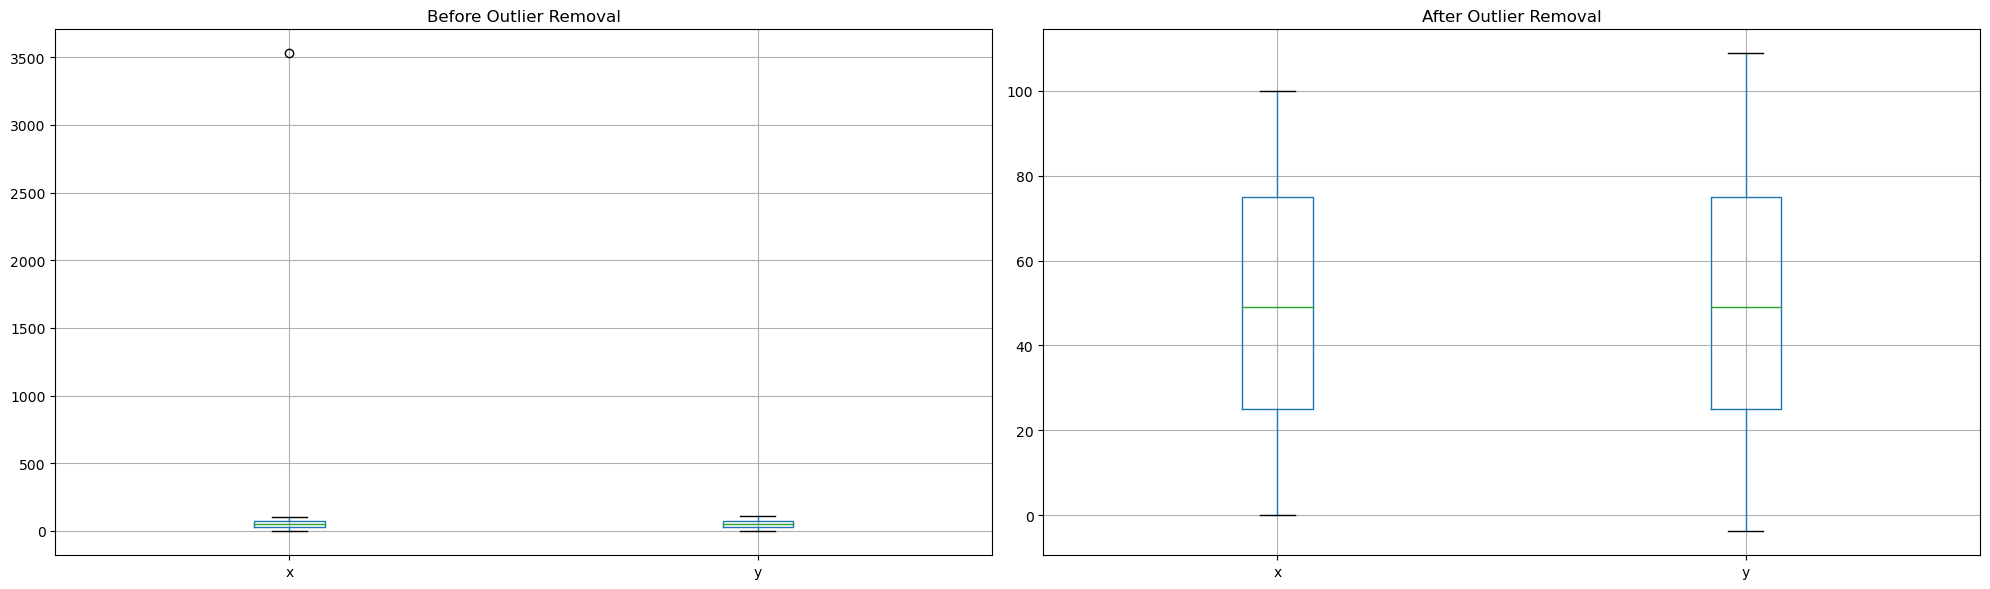

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `data` is your original DataFrame
numeric_cols = data.select_dtypes(include=[np.number])


plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]


plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()



# DATA TRANSFORMATION

In [45]:



numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)


scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)


scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)


print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(700, 2)

************************************************************


,x,y
0,0.006799,0.225260
1,0.014164,0.455183
2,0.004249,0.186836
3,0.010764,0.358671
4,0.024645,0.808515


# STANDARIZATION

In [51]:

from sklearn.preprocessing import StandardScaler




numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)


scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)


scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()
(133, 13)

(700, 2)

************************************************************


(133, 13)

In [27]:
data["x"].unique()

array([2.40000000e+01, 5.00000000e+01, 1.50000000e+01, 3.80000000e+01,
       8.70000000e+01, 3.60000000e+01, 1.20000000e+01, 8.10000000e+01,
       2.50000000e+01, 5.00000000e+00, 1.60000000e+01, 3.90000000e+01,
       5.40000000e+01, 6.00000000e+01, 2.60000000e+01, 7.30000000e+01,
       2.90000000e+01, 3.10000000e+01, 6.80000000e+01, 5.80000000e+01,
       8.40000000e+01, 4.90000000e+01, 2.00000000e+01, 9.00000000e+01,
       4.80000000e+01, 4.00000000e+00, 4.20000000e+01, 0.00000000e+00,
       9.30000000e+01, 7.00000000e+00, 2.10000000e+01, 1.90000000e+01,
       5.90000000e+01, 5.10000000e+01, 3.30000000e+01, 8.50000000e+01,
       4.40000000e+01, 1.40000000e+01, 9.00000000e+00, 7.50000000e+01,
       6.90000000e+01, 1.00000000e+01, 1.70000000e+01, 7.40000000e+01,
       6.40000000e+01, 3.20000000e+01, 4.10000000e+01, 3.00000000e+00,
       1.10000000e+01, 8.30000000e+01, 7.60000000e+01, 9.50000000e+01,
       5.30000000e+01, 7.70000000e+01, 5.50000000e+01, 3.50000000e+01,
      

In [28]:
data.x.unique()

array([2.40000000e+01, 5.00000000e+01, 1.50000000e+01, 3.80000000e+01,
       8.70000000e+01, 3.60000000e+01, 1.20000000e+01, 8.10000000e+01,
       2.50000000e+01, 5.00000000e+00, 1.60000000e+01, 3.90000000e+01,
       5.40000000e+01, 6.00000000e+01, 2.60000000e+01, 7.30000000e+01,
       2.90000000e+01, 3.10000000e+01, 6.80000000e+01, 5.80000000e+01,
       8.40000000e+01, 4.90000000e+01, 2.00000000e+01, 9.00000000e+01,
       4.80000000e+01, 4.00000000e+00, 4.20000000e+01, 0.00000000e+00,
       9.30000000e+01, 7.00000000e+00, 2.10000000e+01, 1.90000000e+01,
       5.90000000e+01, 5.10000000e+01, 3.30000000e+01, 8.50000000e+01,
       4.40000000e+01, 1.40000000e+01, 9.00000000e+00, 7.50000000e+01,
       6.90000000e+01, 1.00000000e+01, 1.70000000e+01, 7.40000000e+01,
       6.40000000e+01, 3.20000000e+01, 4.10000000e+01, 3.00000000e+00,
       1.10000000e+01, 8.30000000e+01, 7.60000000e+01, 9.50000000e+01,
       5.30000000e+01, 7.70000000e+01, 5.50000000e+01, 3.50000000e+01,
      

In [47]:



cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']


data1 = pd.get_dummies(cat_features)
data1

C:\Users\ideal\AppData\Local\Temp\ipykernel_16844\2279752901.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data1 = pd.get_dummies(cat_features)


""


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


# LINEAR REGRESSION

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [32]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6536995137170021


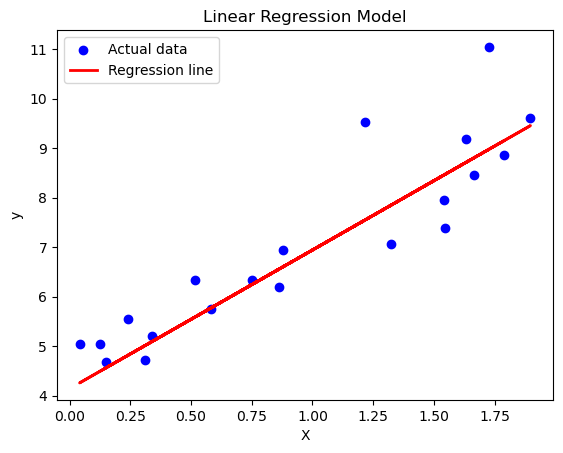

In [37]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Model')
plt.show()

In [38]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [39]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [41]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [42]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 0.6536995137170021
Mean Absolute Error (MAE): 0.5913425779189777
Root Mean Squared Error (RMSE): 0.8085168605026132
R² Score: 0.8072059636181392
